In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from scipy import stats 

In [2]:
stats? 
# probability distributions and statistical functions.

In [5]:
#from sklearn.datasets.samples_generator import make_blobs #sklearn.datasets.samples_generator module is  deprecated in version 0.22 
from sklearn.datasets import make_blobs

In [16]:
make_blobs?

In [17]:
X, y =make_blobs(n_samples=50,
                 n_features2,
                 centers=2,
                 random_state=0,
                 cluster_std=0.60)

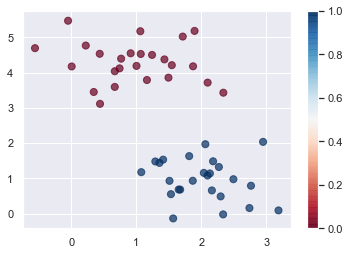

In [20]:
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='RdBu',alpha=0.7)
plt.colorbar()

In [19]:
y

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0])

(-1.0, 3.5)

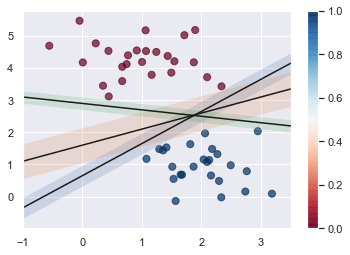

In [31]:
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='RdBu',alpha=0.7)
plt.colorbar()
xfit=np.linspace(-1,3.5)
for m,b,d in [(1,0.65,0.33),(0.5,1.6,0.55),(-0.2,2.9,0.2)]:
    yfit=m*xfit+b
    plt.plot(xfit,yfit,'-k')
    plt.fill_between(xfit,yfit-d,yfit+d,alpha=0.2)
    
plt.xlim(-1,3.5)    

maximize the margin 

In [33]:
from sklearn.svm import SVC   #C-Support Vector Classification.

In [35]:
model=SVC(kernel='linear' ,C=1E10)
# kernel:  'linear', 'poly', 'rbf', 'sigmoid', 'precomputed', default rbf
# C: Regularization parameter. The strength of the regularization is inversely proportional to C. 

In [36]:
model.fit(X,y)

SVC(C=10000000000.0, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [37]:
plt.gca?

In [46]:
model.decision_function?

In [101]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    '''Plot the decision function for a 2D SVC'''
    if ax is None:
        ax=plt.gca() #get current Axes instance
    xlim=ax.get_xlim()
    ylim=ax.get_ylim()
    x=np.linspace(xlim[0],xlim[1],30) #slice 30 points from min to max on x axis
    y=np.linspace(ylim[0],ylim[1],30)
    Y, X = np.meshgrid(y,x)
    xy=np.vstack([X.ravel(),Y.ravel()]).T # ravel: to separate a knot. numpy.ravel: returns contiguous flattened (1D) array 
    P=model.decision_function(xy).reshape(X.shape)

    
    ax.contour(X,Y,
               P, #The height values over which the contour is drawn.
               colors='k',
               levels=[-1,0,1], #If array-like, draw contour lines at the specified levels.
               alpha=0.5,
               linestyles=['--','-','--']) #only draw 3 levels
    
    if plot_support:
        ax.scatter(model.support_vectors_[:,0], model.support_vectors_[:,1], 
                   s=300,marker='o', linewidth=1,alpha=0.3,c='b')
        
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    

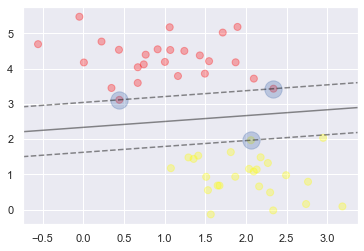

In [102]:
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn',alpha=0.3)
plot_svc_decision_function(model)

1. maximize the margin between two sets of points
2. the circles are pivotal element of this fits, known as the support vectors (p.409)
3. only the 3 support vectors make the model, other points inner the boundary don't change the model because they don't contribute the loss fuction (p.410)
4. So the SVM model is insensitive to the outer extreme value.

In [104]:
model.support_vectors_ #Support vectors

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

In [106]:
model?

In [107]:
model.n_support_ 

array([2, 1])

In [108]:
model.coef_ 

array([[ 0.23525694, -1.41250783]])

In [121]:
print(model.predict([[1,1],[3,5],[1,2.5],[1,2.6]]))

[1 0 1 0]


AttributeError: predict_proba is not available when  probability=False